In [30]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import signal
%matplotlib inline 

## Check sides (of hand)

In [ ]:
pd.read_hdf('//FS2.smpp.local\\RTO\\CIS-PD MUSC\\decoded_forms\\form501.h5')

## Load Data

In [2]:
# 1004, trial 1, walking
Watch = pd.read_csv('//FS2.smpp.local\\RTO\\CIS-PD Study\\MJFF Curation\\TaskAcc\\1004_1_Wlkg.csv')

In [ ]:
Watch.head(5)

In [52]:
# convert timestamp to datetime type
Watch['timestamp'] = pd.to_datetime(Watch['timestamp'])

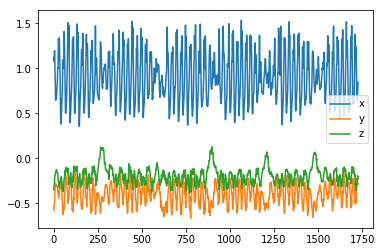

In [53]:
Watch.loc[:,['x','y','z']].plot()

In [100]:
# Right hand accelerometer for subject 1004
MC10 = pd.read_csv('//FS2.smpp.local\\RTO\\CIS-PD Study\\Subjects\\1004\\dorsal_hand_right\\d5la7ybu\\2017-07-07T14-20-44-065Z\\accel.csv')

In [101]:
MC10.loc[:,'Timestamp (ms)'] = MC10['Timestamp (ms)'].apply(
    lambda x: datetime.utcfromtimestamp(x/1000).strftime('%Y-%m-%d %H:%M:%S.%f')[:-3])

# Downsampling MC10 to match 50Hz on Watch

In [102]:
MC10.head(3)

,Timestamp (ms),Accel X (g),Accel Y (g),Accel Z (g)
0,2017-07-07 14:20:44.065,-0.984573,0.058412,0.005066
1,2017-07-07 14:20:44.081,-0.986282,0.059266,0.003601
2,2017-07-07 14:20:44.097,-0.988724,0.058778,0.004334


In [104]:
len(MC10)

536280

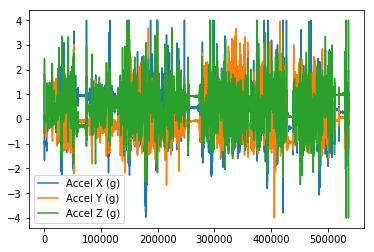

In [71]:
# entire dataset
MC10.plot()

In [105]:
# convert timestamp to datetime type
MC10['Timestamp (ms)'] = pd.to_datetime(MC10['Timestamp (ms)'])

In [106]:
MC10 = MC10.set_index('Timestamp (ms)')

In [83]:
MC10.head(3)

,Accel X (g),Accel Y (g),Accel Z (g)
Timestamp (ms),,,
2017-07-07 14:20:44.065,-0.984573,0.058412,0.005066
2017-07-07 14:20:44.081,-0.986282,0.059266,0.003601
2017-07-07 14:20:44.097,-0.988724,0.058778,0.004334


MC10 16 ms interval
watch 20 ms interval

In [108]:
# length before resample
len(MC10)

536280

pandas.DataFrame.resample
- Notes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.resample.html)
- defaults: how='mean', axis=0 for index
- args: kind={'timestamp'}, loffset=timedelta

In [114]:
# downsample MC10
resampled = MC10.resample('20ms').mean()

In [115]:
# length after downsample, should be smaller
len(resampled)

428487

In [110]:
# approximate length change after downsampling checks out
len(MC10)*50/62.5

429024.0

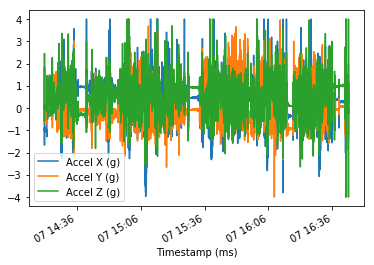

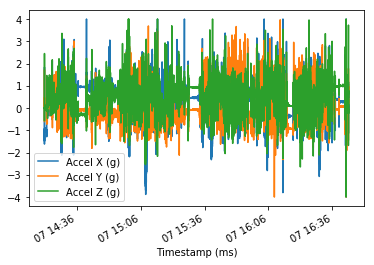

In [119]:
# check that it's the same plot after resampling
MC10.plot()
resampled.plot()

In [54]:
Watch.iloc[:,3:].head(1)

,timestamp,x,y,z
0,2017-07-07 14:25:28.372,1.084717,-0.577881,-0.348389


In [95]:
df = Watch.iloc[:,3:].set_index('timestamp')

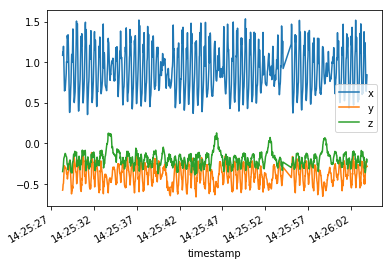

In [97]:
# plot at original 62.5 Hz
df.plot()

In [98]:
MC10.resample('20ms')

DatetimeIndexResampler [freq=<20 * Millis>, axis=0, closed=left, label=left, convention=start, base=0]

In [99]:
len(MC10)

536280

In [61]:
len(downsample)

1728

In [64]:
60/62.5

0.96

In [65]:
60/50

1.2

## Find matching(?) time range

Todo:
- add buffer (+/- 2s)
- resample MC10 to match watch frequency (50Hz)
- find optimal lag from cross correlation


In [14]:
inds = (MC10['Timestamp (ms)'] > Watch.timestamp.min()) & \
       (MC10['Timestamp (ms)'] < Watch.timestamp.max())

In [9]:
sum(inds)

2220

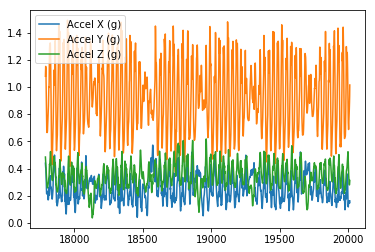

In [10]:
MC10[inds].iloc[:,1:].plot()

In [11]:
from scipy.signal import correlate, resample

In [16]:
# option 1: resample()
# Does NOT seem to be the right function
A = resample(MC10['Accel Y (g)'],len(Watch))
B = Watch['x']

C:\Users\anaconda3\lib\site-packages\scipy\signal\signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
C:\Users\anaconda3\lib\site-packages\scipy\signal\signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
C:\Users\anaconda3\lib\site-packages\scipy\signal\signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`,

In [ ]:
# option 2: asfreq()
# Does NOT seem to be the right function
A = resample(MC10['Accel Y (g)'],len(Watch))
B = Watch['x']

In [69]:
lag = np.argmax(correlate(A, B))

In [56]:
lag

1289

In [70]:
lag

2629

# Action list to correlate watch and sensor data
- downsample signal from 62.5 Hz to 50 Hz
- cross correlation lag
- offset = lag/50